In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings


In [32]:
df = pd.read_excel('glass.xlsx', sheet_name='glass')

In [33]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [34]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [36]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [37]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [38]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [39]:
print("\nClass distribution:")
df['Type'].value_counts()


Class distribution:


,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


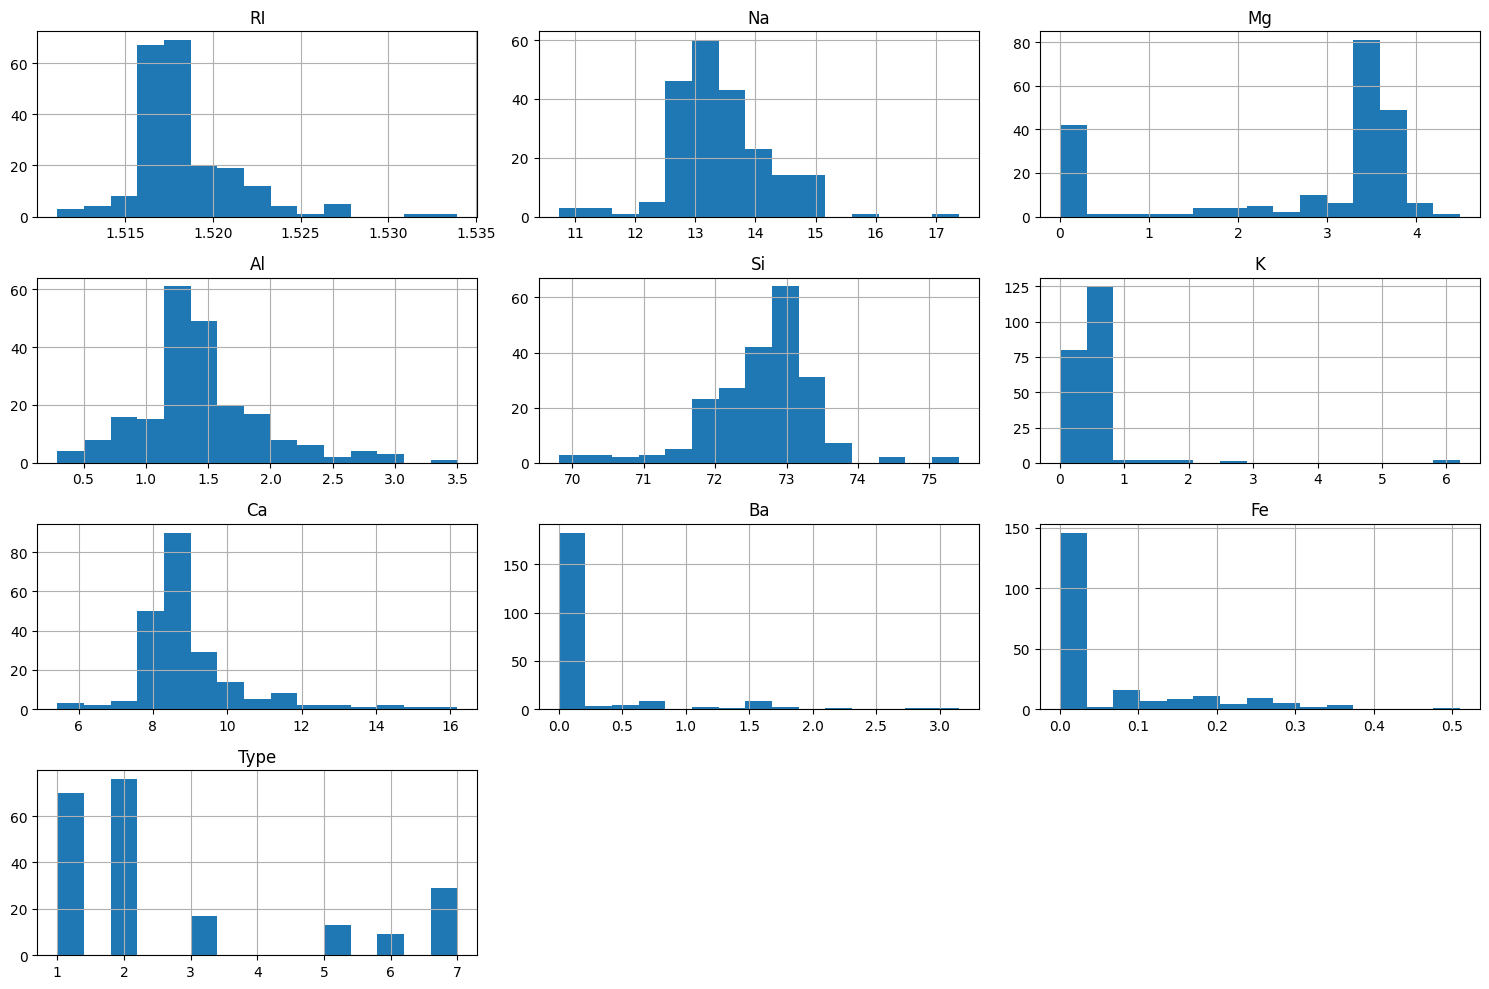

In [40]:
#histo
df.hist(bins = 15, figsize=(15,10), layout = (4,3))
plt.tight_layout()
plt.show()

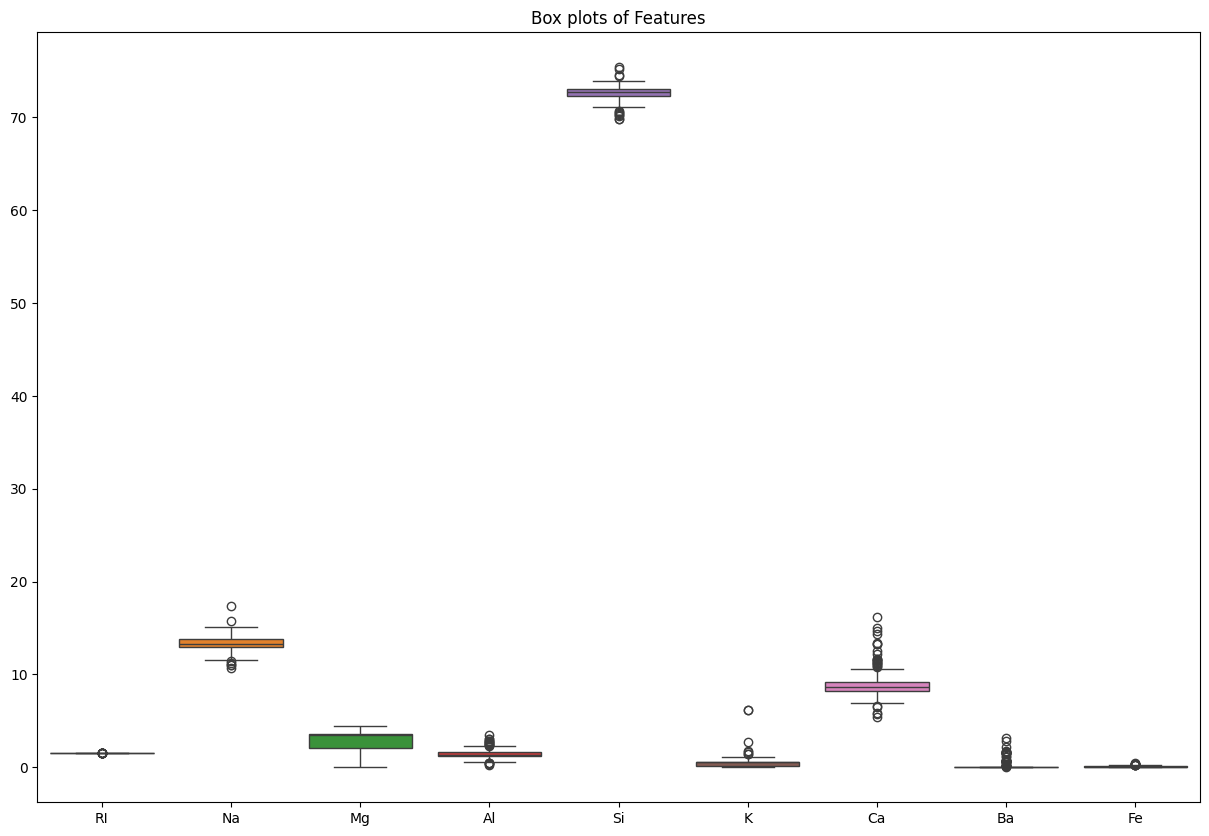

In [41]:
#Boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=df.drop('Type', axis = 1))
plt.title("Box plots of Features")
plt.show()

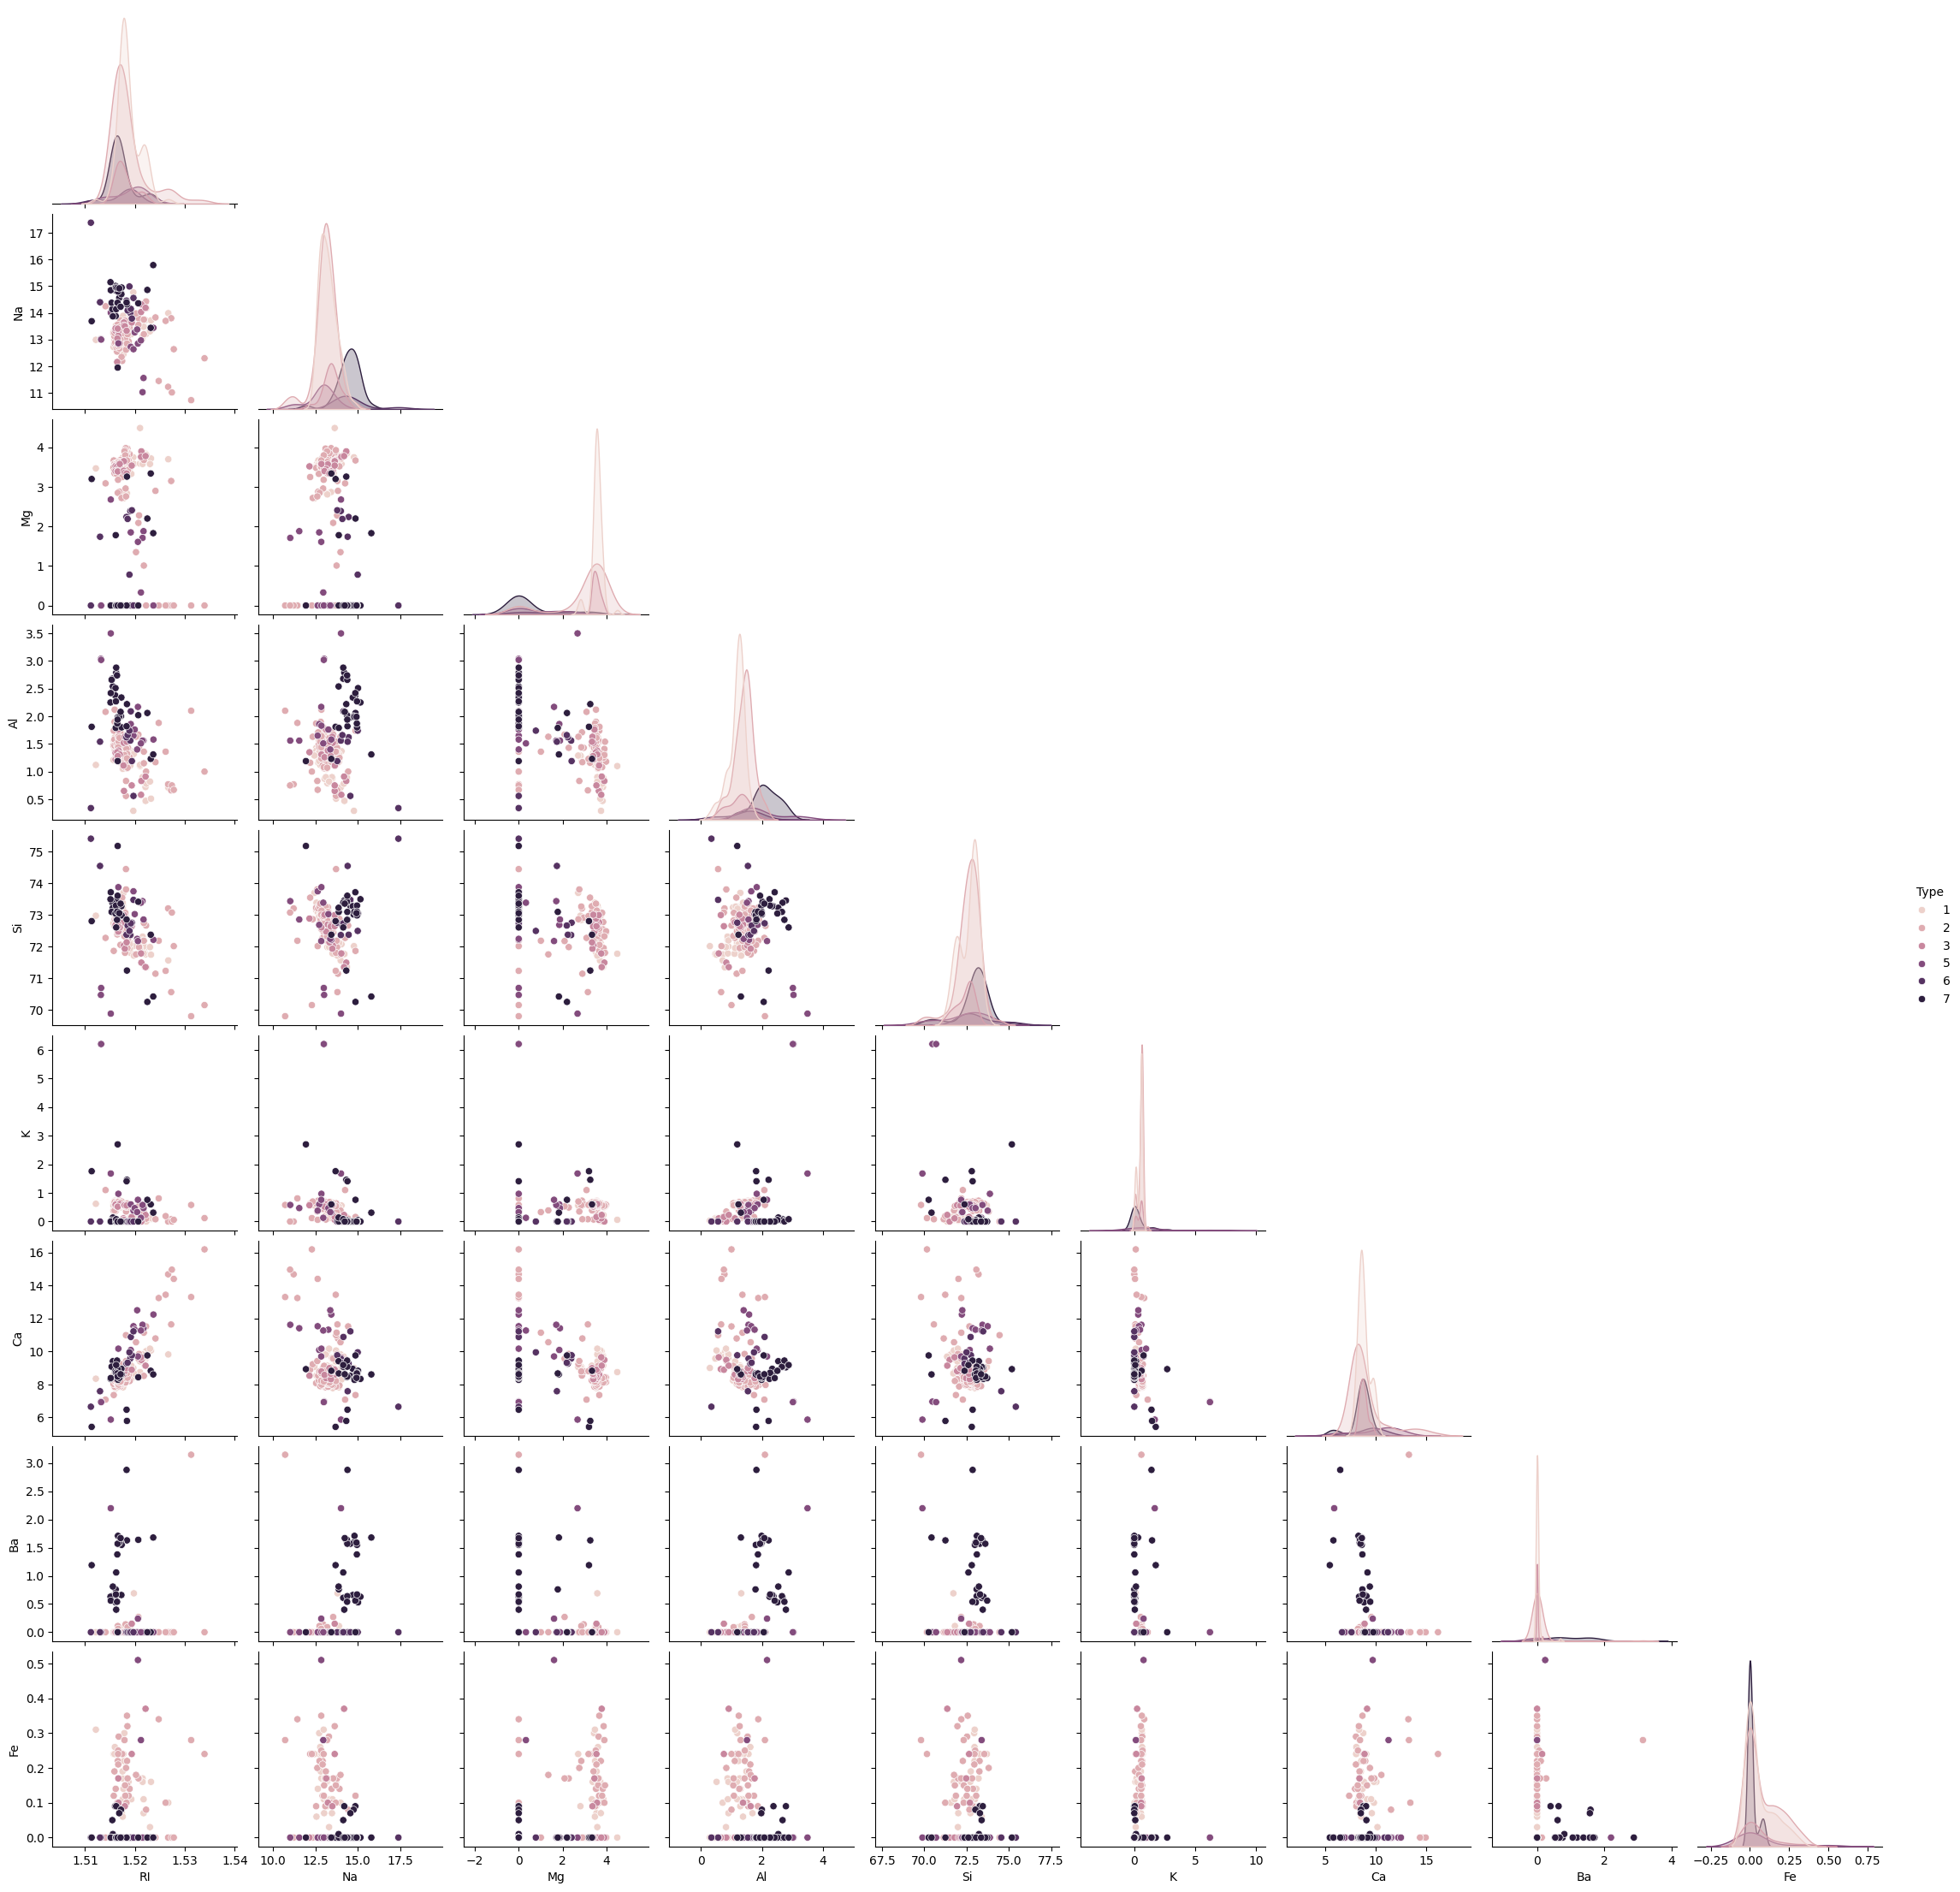

In [42]:
sns.pairplot(df, hue='Type', diag_kind='kde', corner=True)
plt.show()

In [43]:
x = df.drop("Type", axis = 1)
y = df["Type"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [44]:
print("Class distribution before handling imbalance:")
print(y.value_counts())

Class distribution before handling imbalance:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [45]:
# Split the dataset into training and testing sets with stratification
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [46]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

In [47]:
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')

Random Forest Classifier Report:
              precision    recall  f1-score   support

           1       0.79      0.90      0.84        21
           2       0.90      0.78      0.84        23
           3       0.67      0.40      0.50         5
           5       0.67      1.00      0.80         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.83        65
   macro avg       0.80      0.83      0.80        65
weighted avg       0.84      0.83      0.83        65

Confusion Matrix:
[[19  1  1  0  0  0]
 [ 2 18  0  2  1  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  8]]
Accuracy: 0.83


In [48]:
base_estimator = DecisionTreeClassifier(random_state=42)

# Remove base_estimator argument. It will default to DecisionTreeClassifier
bagging_clf = BaggingClassifier(n_estimators=100, random_state=42)

bagging_clf.fit(x_train, y_train)

y_pred_bag = bagging_clf.predict(x_test)

# Evaluation
print("\nBagging Classifier Report:")
print(classification_report(y_test, y_pred_bag))


Bagging Classifier Report:
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        21
           2       0.84      0.70      0.76        23
           3       0.67      0.40      0.50         5
           5       0.60      0.75      0.67         4
           6       0.75      1.00      0.86         3
           7       0.90      1.00      0.95         9

    accuracy                           0.78        65
   macro avg       0.75      0.78      0.76        65
weighted avg       0.79      0.78      0.78        65



In [49]:
ada_clf = AdaBoostClassifier(
    estimator=base_estimator, n_estimators=100, random_state=42)

ada_clf.fit(x_train, y_train)

# Predict on the test data
y_pred_ada = ada_clf.predict(x_test)

# Evaluation
print("\nAdaBoost Classifier Report:")
print(classification_report(y_test, y_pred_ada))



AdaBoost Classifier Report:
              precision    recall  f1-score   support

           1       0.82      0.86      0.84        21
           2       0.82      0.61      0.70        23
           3       0.38      0.60      0.46         5
           5       0.75      0.75      0.75         4
           6       0.50      0.67      0.57         3
           7       0.90      1.00      0.95         9

    accuracy                           0.75        65
   macro avg       0.69      0.75      0.71        65
weighted avg       0.78      0.75      0.76        65



**1. Explain Bagging and Boosting methods. How is it different from each other.**

Ans: Bagging creates multiple subsets of the original dataset using sampling with replacement. Each subset is used to train a base estimator independently.

Boosting trains base estimators sequentially. Each new estimator focuses on correcting the errors made by the previous ones.

**Differences:**

**Training Approach:** Bagging trains estimators in parallel; boosting trains them sequentially.
**Focus:** Bagging reduces variance; boosting reduces bias and variance.

**Complexity:** Boosting can achieve higher accuracy but is more prone to overfitting than bagging.


**2. Explain how to handle imbalance in the data.**

Ans: Handling Imbalanced Data:

**Resampling Techniques:**

**Oversampling:** Increase the number of instances in minority classes (e.g., SMOTE).

**Undersampling:** Decrease the number of instances in majority classes.

**Use of Appropriate Metrics:**
Metrics like precision, recall, F1-score, and ROC-AUC are more informative than accuracy.

**Algorithmic Solutions:**

**Class Weighting:** Assign higher weights to minority classes in the loss function.

**Ensemble Methods:** Use algorithms that are robust to class imbalance.